# A/B Test Exercise: Spiced search results - changing title color

Comparing two different versions of a website or a search result is a very typical example of A/B testing that you can encounter as a business or marketing data analyst.

In this case we are experimenting with two different colors as presented on pictures below. The visitors were randomly split into two groups where each group has seen only one color. Our task is to establish which color is performing better in terms of the conversion rate (the proportion of how many people clicked on the linked vs the number of people who have seen the search result)

#### Group A

![group_a.png](visitors_group_a.png)

#### Group B

![visitors_group_b.png](visitors_group_b.png)

Below you can see how we can perform such a test using python:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [5]:
# read the visitors.csv file containing the number of daily visitors for both groups for 30 days

df = pd.read_csv('visitors.csv')
df = df.drop('Unnamed: 0', axis=1)

In [13]:
df

,purple,blue
0,32.357176,24.010799
1,24.045122,27.687188
2,37.163535,31.237893
3,28.436741,31.229691
4,26.397056,30.318586
5,34.435815,25.389542
6,34.297942,26.623565
7,26.817382,24.386026
8,30.078482,30.208374
9,18.786575,37.954803


In [12]:
# calculate the means of both groups and their difference

mean_p = df.purple.mean()
mean_b = df.blue.mean()
difference = mean_p - mean_b
print(f'mean of purple is {mean_p}, mean of blue is {mean_b}, difference is {difference}')

mean of purple is 30.04092225248258, mean of blue is 26.518728895668595, difference is 3.522193356813986


<Axes: >

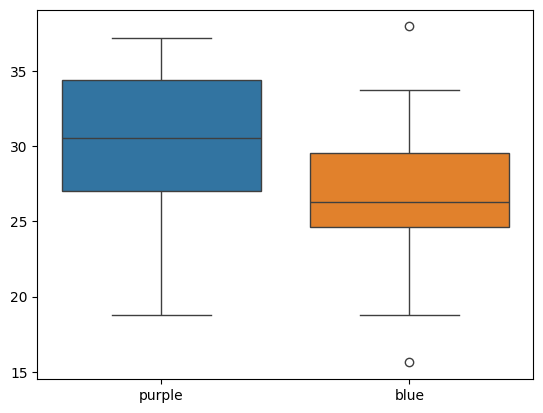

In [7]:
# plot the two groups boxplots
sns.boxplot(data=df)

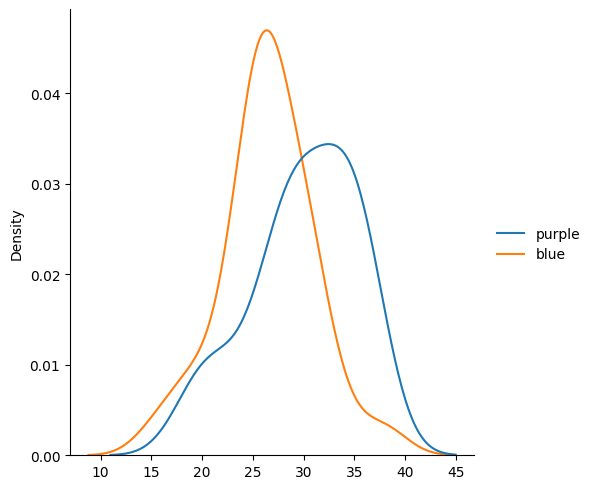

In [9]:
# plot the distributions of both groups using either histograms of displot

sns.displot(data=df, kind='kde')

In [10]:
# apply the two-sample t-test on the data. What is the p-value?  Use a significance level of 0.05
stats.ttest_ind(df['purple'], df['blue'], nan_policy='omit', equal_var=False)


TtestResult(statistic=np.float64(2.8205655591656997), pvalue=np.float64(0.006585299356873966), df=np.float64(56.985398615456674))

### Conclusion: Which group is better ??

since p-value < 0.05, then we conclude that the purple title did indeed cause an increase in the number of people visiting the SPICED website after doing a google search on 'spiced'